In [3]:
import scipy.stats as stats
import numpy as np
import numpy.random as npr

import matplotlib.pyplot as plt
%matplotlib inline

import pickle

## Testing Whether Data Comes from a Distribution: Continuous Distributions 

Consider the dataset stored in the file ```lightbulb.pickle```. Let's consider how we can determine what distribution this data comes from. 

Begin by loading the data:

In [4]:
file=open("lightbulb.pickle","rb")

In [5]:
lb=pickle.load(file)
file.close()

How should we determine what distribution this data comes from?

1) Let's look at what sorts of values we got:

In [6]:
print(lb[:50])

[ 887.7415503   208.72771492  389.00714683  183.18045766  920.22754213
 2461.6626774   607.78389789  414.15694351  263.98779539  176.9330967
  299.93308142  443.2713806   573.42681808   46.23002197   74.8567485
   47.26357526  895.60807601  294.04566125  388.85985157  129.06611905
  448.9831565   191.58687295  388.62848586  819.18336506  382.7912885
 1453.46975      39.43299978  199.0261991   261.29036441  378.52594954
  720.35231601   18.90299026  960.07827717 1714.80328959   36.80597999
  240.34430536 1315.28561533  214.39605876  144.81915044  706.99767947
  192.29612863  206.80354989  177.36177955 1450.0942653   279.46545748
  447.63800719  471.88379668   71.77093065  357.1771056   743.68617784]


The values seem to be coming from throughout the real line -- this data is from a continous distribution. 


Now we need to try to determine which continuous distribution is a good fit for the data.

2) Start by plotting a histogram of the data. 

**Adjust the number of bins to provide an appropriate amount of resolution to help infer what distribution this might be from.**

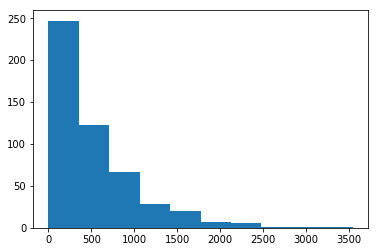

In [7]:
plt.hist(lb);

Clearly the data is not Gaussian/Normal or Uniform. (For instance, both those distributions are continuous. Of the distributions we have considered, this seems to match the exponential random variable. 

Assuming that this is from an exponential distribution, we can compare the histogram of the data with that from the theoretical model. The exponential distribution is characterized by a single parameter, either $\lambda$ or $\mu=1 \lambda$, which is the mean.

3) Let's estimate the mean of the reference distribution. We know that the sample mean estimator is an unbiased estimate of the mean:

In [8]:
mu_hat= lb.mean()
mu_hat

522.7296432789975

4) Now create an exponential random variable object and draw data from this reference distribution:

In [9]:
E=stats.expon(scale=mu_hat)

In [10]:
ref=E.rvs(len(lb))

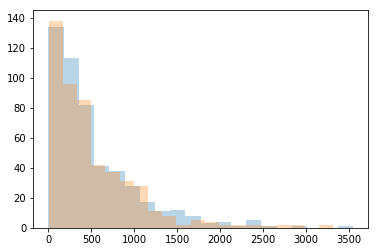

In [11]:
plt.hist(lb,bins=20,alpha=0.3)
plt.hist(ref,bins=20,alpha=0.3);

The match is not perfect, but they are similar. Since this data comes from a continuous distribution, kernel density estimation (KDE) would be even better than a histogram, and I ask you to do that in the Lecture 33 Assignment. You may wish to review Lecture 25 as a refresher on KDE.

Let's investigate other ways that we can visually compare these data. 

We will first generate a quantile-quantile (Q-Q) plot for the data.

The $k$th **quantile** from a data set of length $n$ is the data point that is $k/n$th of the way through the ordered set.  

In a Q-Q plot, we plot the data at a particular quantile in one data set vs the data at a particular quantile in another data set. 

**Read the wikipedia page on Q-Q plots:**

https://en.wikipedia.org/wiki/Q–Q_plot

We will only consider the easiest case, which is when the data sets are of the same size. In that case, we can just plot the sorted values with respect to each other:




Text(0, 0.5, 'Quantiles from Lightbulb Data')

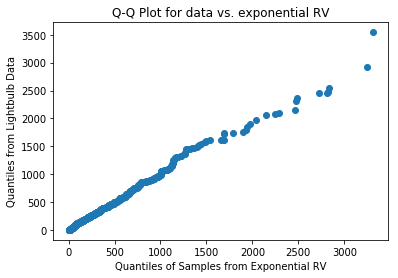

In [12]:
plt.scatter(np.sort(ref),np.sort(lb))
plt.title("Q-Q Plot for data vs. exponential RV")
plt.xlabel("Quantiles of Samples from Exponential RV")
plt.ylabel("Quantiles from Lightbulb Data")

If the data is from the same distribution, the plot should be approximately linear

When we are comparing data to a known distribution, we can get the exact quantiles from the distribution of the random variable, rather than using samples from the random variable. 

Sometimes this type of plot is called a **probability plot**, and I will use that terminology in this class. More generally, the term probability plot is sometimes used to refer to a broader class of plots including the Q-Q plot. We can get the quantiles from a distribution using the inverse CDF (in ```scipy.stats```, this is called the percent point function (ppf):

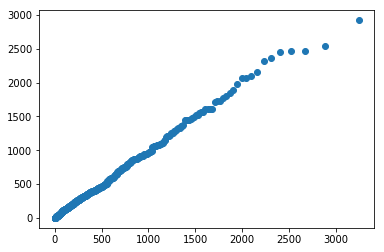

In [13]:
proportions=np.linspace(0,1,len(lb))
plt.scatter(E.ppf(proportions),np.sort(lb));

We observe that the function is **even more linear**. It has a little less variation because we have eliminated one of the sources of randomness in the Q-Q plot.

Finally, we leverage the ```scipy.stats``` ```probplot``` method to generate the same plot directly:

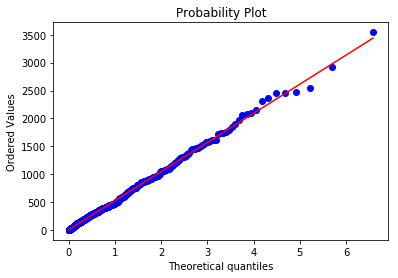

In [14]:
stats.probplot(lb,dist='expon',plot=plt);

Note that ```stats.probplot``` shows both the same probability plot of quantiles that we generated, but also shows a line fitted to the data, using a technique called *linear regression*.


Read the docstring for the ```stats.probplot``` method:

In [16]:
?stats.probplot

Note that we can only use ```stats.probplot``` for distributions that ```scipy.stats``` knows (but that is A LOT)

After you have read the docstring and understand the outputs, let's store those and look at them: 

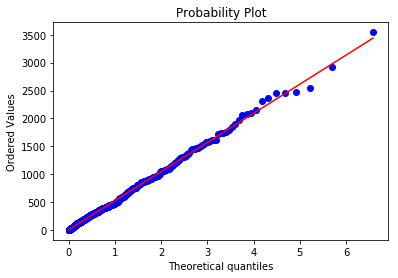

In [17]:
quantiles,regress_info=stats.probplot(lb,dist='expon',plot=plt);

We are not yet ready to talk in detail about linear regression, but basically it is finding the best line to fit a set of data (when the error is mean-squared error).

The regression parameters are (from the docstring): (slope, intercept, r)

You all should be familiar with the slope and interecept of a line. The parameter ```r``` (usually written $R$ in text) measures how close the data fits the line. We will work with $R^2$ instead. The closer $R^2$ is to 1, then the better the line fits the quantiles (and the better our reference distribution fits the data). We will consider the reference distribution to be a good match for the data if $R^2 >= 0.95$ .

Let's check how well the exponential distribution fits our data:

In [18]:
print(regress_info)
r=regress_info[2]
print("R^2 =",r**2)

(522.2937228908747, 1.920305614259746, 0.9989686323478808)
R^2 = 0.9979383284149954


Since $R^2 > 0.997$, the exponential distribution is an excellent fit to this data set.

When the reference distribution is Gaussian, then a probability plot is typically called a **normal probability plot**. You can read more about probability plots and normal probability plots in Section 5.3 of the *ThinkStats 2* book.